In [1]:
import matplotlib.pyplot as plt 
import matplotlib.animation as animation 
import numpy as np 
import pandas as pd

In [2]:
df=pd.read_csv('../3k.dat',sep=' ')
df

,x1,y1,x2,y2,x3,y3,t,E
0,-0.500000,0.000000,0.700000,0.700000,0.800000,-0.800000,0.00,-4.38554
1,-0.499930,-0.000003,0.699981,0.699943,0.799980,-0.799956,0.01,-4.38554
2,-0.499720,-0.000012,0.699922,0.699771,0.799918,-0.799823,0.02,-4.38554
3,-0.499369,-0.000026,0.699825,0.699485,0.799816,-0.799601,0.03,-4.38554
4,-0.498878,-0.000047,0.699689,0.699084,0.799672,-0.799290,0.04,-4.38554
...,...,...,...,...,...,...,...,...
1995,210.737000,21.673200,-88.123100,-83.798000,-38.201300,51.736900,19.95,103.88000
1996,210.848000,21.684600,-88.169500,-83.841900,-38.221700,51.764100,19.96,103.88000
1997,210.958000,21.696000,-88.216000,-83.885800,-38.242100,51.791400,19.97,103.88000
1998,211.069000,21.707400,-88.262500,-83.929800,-38.262500,51.818600,19.98,103.88000


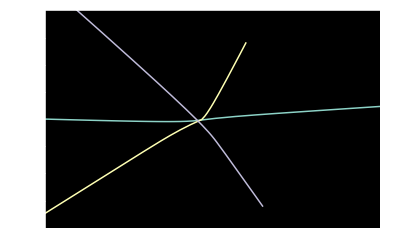

In [3]:
plt.style.use('dark_background')
plt.plot(df['x1'],df['y1'])
plt.plot(df['x2'],df['y2'])
plt.plot(df['x3'],df['y3'])

axes = plt.gca()
axes.set_xlim(-0.5,1.5)
axes.set_ylim(-1,1)

plt.savefig('3k-almost-colliding.svg')

In [4]:
# initialization function 
def init(): 
	# creating an empty plot/frame 
	line1.set_data([], []) 
	line2.set_data([], []) 
	line3.set_data([], []) 

	points.set_data([], [])
	return line1, line2, line3, points

# animation function 
def animate(i): 
	k = i
	# x, y values to be plotted 
	x1 = df['x1'][k]
	y1 = df['y1'][k]
	x2 = df['x2'][k]
	y2 = df['y2'][k]
	x3 = df['x3'][k]
	y3 = df['y3'][k]
	
	# appending new points to x, y axes points list 
	x1data.append(x1) 
	y1data.append(y1)
	x2data.append(x2)
	y2data.append(y2)
	x3data.append(x3)
	y3data.append(y3)

	line1.set_data(x1data, y1data) 
	line2.set_data(x2data, y2data)
	line3.set_data(x3data, y3data)
	points.set_data([x1,x2,x3], [y1,y2,y3])
	return line1, line2, line3 , points

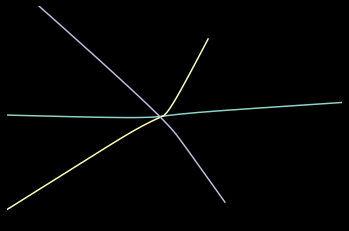

In [6]:
plt.style.use('dark_background')

# lists to store x and y axis points 
x1data, y1data, x2data, y2data, x3data, y3data = [], [], [], [],[], []

fig = plt.figure() 
ax = plt.axes(xlim=(-0.5,1.5), ylim=(-1, 1)) 
line1, = ax.plot([], []) 
line2, = ax.plot([], []) 
line3, = ax.plot([], [])
points, = ax.plot([], [], 'o')


# setting a title for the plot 
# plt.title('Creating a growing coil with matplotlib!') 
# hiding the axis details 
plt.axis('off') 

# call the animator	 
anim = animation.FuncAnimation(fig, animate,  init_func=init,
							frames=200, interval=20, blit=True) 

# save the animation as mp4 video file 
anim.save('3k-almost-colliding.gif',writer='imagemagick') 